**Robert Knox**

## Data Processing

### data import

In [2]:
import pandas as pd
#read in the data from the website

adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [3]:
colnames = "age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary"
list_of_columns = colnames.split(',')
adult_df.columns = list_of_columns
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.shape

(32561, 15)

In [5]:
#d) Drop the 3rd column from the data
adult_df = adult_df.drop(['fnlwgt'],axis=1)
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#double check for NAs
adult_df.isna().any().any()

False

In [7]:
adult_df[['salary']] = adult_df[['salary']].replace("<=50K","0")
adult_df[['salary']] = adult_df[['salary']].replace(">50K","1")

In [8]:
adult_df[['salary']] = adult_df[['salary']].replace("<=50K","0")
adult_df[['salary']] = adult_df[['salary']].replace(">50K","1")
adult_df[['salary']] = adult_df[['salary']].apply(pd.to_numeric)

In [9]:
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
X = adult_df.iloc[:,0:13]
X.shape

(32561, 13)

In [11]:
y = adult_df.iloc[:,13]
y.shape

(32561,)

In [12]:
X_encoded = pd.get_dummies(X)

In [13]:
X_encoded.shape

(32561, 107)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)

In [15]:
print("X_train: {}".format(X_train.shape),"\nX_test: {}".format(X_test.shape))

X_train: (22792, 107) 
X_test: (9769, 107)


## Base Model

SciKit Learn Random Forest Classifier with default values

In [16]:
from sklearn.ensemble import RandomForestClassifier

rforest1 = RandomForestClassifier()
rforest1.fit(X_train,y_train)
yhat = rforest1.predict(X_test)
yhat_probs = rforest1.predict_proba(X_test)
print('yhat:',yhat,'\nyhat_probs:',yhat_probs)

C:\Users\Bob\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


yhat: [0 1 1 ... 0 0 1] 
yhat_probs: [[1.         0.        ]
 [0.3        0.7       ]
 [0.25       0.75      ]
 ...
 [1.         0.        ]
 [0.56666667 0.43333333]
 [0.         1.        ]]


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cmbase = confusion_matrix(y_test,yhat)
crbase = classification_report(y_test,yhat)
print(cmbase,"\n",crbase)

[[6870  585]
 [ 923 1391]] 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7455
           1       0.70      0.60      0.65      2314

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [18]:
roc_auc_score(y_test,yhat)

0.7613263852779599

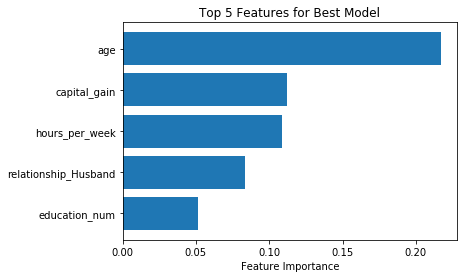

In [28]:
def sorted_feature_importance(feature_importance,column_names):
    #turn that into an enumerated list so we know the index value of the importance
    list_feat_imp = list(enumerate(feature_importance))
    #sort our list in descending fashion
    list_feat_imp_sorted = sorted(list_feat_imp,key=lambda list_feat_imp:list_feat_imp[1],reverse=True)
    #do list comprehension to extract the value of the importance of the feature in
    feat_imp_sorted = [i[1] for i in list_feat_imp_sorted]
    #take the sorted list of features and extract their IDs
    sortednameids = [i[0] for i in list_feat_imp_sorted]
    #map the indices to the actual names from the dataframe
    sortednames = [column_names[i] for i in sortednameids]
    return zip(sortednameids,sortednames,feat_imp_sorted)

def plot_feature_importance(feat_imp,c_names):
    #use the helper function to get sorted features
    srt_feats = sorted_feature_importance(feat_imp,c_names)
    #unzip the values into lists for plotting
    sorted_feat_ids,sorted_names,sorted_feat_vals = zip(*srt_feats)
    plt.barh(sorted_names[4::-1], sorted_feat_vals[4::-1])
    plt.xlabel('Feature Importance')
    plt.title('Top 5 Features for Best Model')
    plt.show()

plot_feature_importance(rforest1.feature_importances_,X_train.columns)

In [22]:
yhat_train = rforest1.predict(X_train)

cmbase_tr = confusion_matrix(y_train,yhat_train)
crbase_tr = classification_report(y_train,yhat_train)
print(cmbase_tr,"\n",crbase_tr)

[[17044   221]
 [  450  5077]] 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17265
           1       0.96      0.92      0.94      5527

   micro avg       0.97      0.97      0.97     22792
   macro avg       0.97      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792



There are signs of overfitting of the model to the training data. There is a large dropoff from the training f1-scores to the test f1-scores.

## AdaBoost Classifier - GridSearch

In [118]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_base = AdaBoostClassifier()
adaboost_base.fit(X_train,y_train)
yhat = adaboost_base.predict(X_test)
yhat_probs = rforest1.predict_proba(X_test)
print('yhat:',yhat,'\nyhat_probs:',yhat_probs)

yhat: [0 1 1 ... 0 0 1] 
yhat_probs: [[1.         0.        ]
 [0.3        0.7       ]
 [0.25       0.75      ]
 ...
 [1.         0.        ]
 [0.56666667 0.43333333]
 [0.         1.        ]]


In [26]:
from sklearn.model_selection import GridSearchCV

adaboost_grid = AdaBoostClassifier()
param_grid = {'n_estimators':[100, 150, 200, 250, 300, 350, 400],
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]}

    
ab_Grid = GridSearchCV(adaboost_grid, param_grid, cv = 5, scoring = 'roc_auc',
                       refit = True, n_jobs=-1, verbose = False)

In [27]:
ab_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=False)

In [29]:
bestparams_ab = ab_Grid.best_params_
bestparams_ab
bestmodel_ab = ab_Grid.best_estimator_
bestmodel_ab

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.2, n_estimators=400, random_state=None)

In [38]:
y_hat_best_ab = bestmodel_ab.predict(X_test)
y_hat_best_ab_proba = bestmodel_ab.predict_proba(X_test)
cmbest_ab = confusion_matrix(y_test,y_hat_best_ab)
crbest_ab = classification_report(y_test,y_hat_best_ab)
print('Best AdaBoost Test Results \nConfusion Matrix:\n',cmbest_ab,
      '\n\nClassification Report:\n',crbest_ab,
      '\nROC AUC Score:', roc_auc_score(y_test, y_hat_best_ab_proba[:,1]))

Best AdaBoost Test Results 
Confusion Matrix:
 [[7008  447]
 [ 807 1507]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769
 
ROC AUC Score: 0.9244122180504519


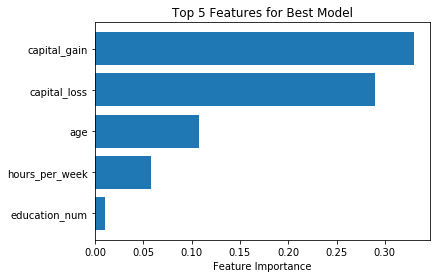

In [34]:
plot_feature_importance(bestmodel_ab.feature_importances_,X_train.columns)

In [37]:
yhat_bestmodel_ab_train = bestmodel_ab.predict(X_train)
cmbestmodel_ab_tr = confusion_matrix(y_train,yhat_bestmodel_ab_train)
crbestmodel_ab_tr = classification_report(y_train,yhat_bestmodel_ab_train)
print('Best AdaBoost Train Results \nConfusion Matrix:\n',cmbestmodel_ab_tr,
      "\nClassification Report:\n",crbestmodel_ab_tr)

Best AdaBoost Train Results 
Confusion Matrix:
 [[16247  1018]
 [ 1902  3625]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

   micro avg       0.87      0.87      0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



The best AdaBoost model has significantly reduced the overfitting observed in the random forest model.

## Gradient Boosting Classifier - GridSearch

In [41]:
from sklearn.ensemble import GradientBoostingClassifier


gradboost_grid = GradientBoostingClassifier()

param_grid_gb = {'n_estimators':[100, 150, 200, 250, 300, 350, 400],
              'learning_rate':[0.1,0.3,0.5,0.7,0.9,1,1.1],
             'max_depth':[1,2]}

    
gb_Grid = GridSearchCV(gradboost_grid, param_grid_gb, cv = 5, scoring = 'roc_auc',
                       refit = True, n_jobs=-1, verbose = False)

In [42]:
gb_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=False)

In [43]:
bestparams_gb = gb_Grid.best_params_
bestparams_gb
bestmodel_gb = gb_Grid.best_estimator_
bestmodel_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [46]:
y_hat_best_gb = bestmodel_gb.predict(X_test)
y_hat_best_gb_proba = bestmodel_gb.predict_proba(X_test)
cmbest_gb = confusion_matrix(y_test,y_hat_best_gb)
crbest_gb = classification_report(y_test,y_hat_best_gb)
print('Best GradientBoost Test Results \nConfusion Matrix:\n',cmbest_gb,
      '\n\nClassification Report:\n',crbest_gb,
      '\nROC AUC Score:', roc_auc_score(y_test, y_hat_best_gb_proba[:,1]))

Best GradientBoost Test Results 
Confusion Matrix:
 [[7018  437]
 [ 796 1518]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.66      0.71      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769
 
ROC AUC Score: 0.9264714765110396


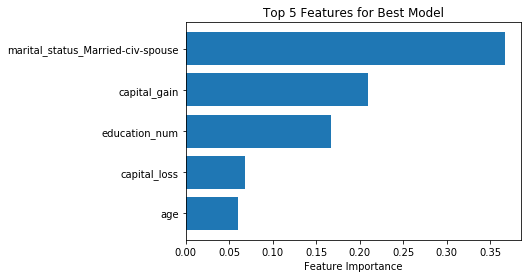

In [45]:
plot_feature_importance(bestmodel_gb.feature_importances_,X_train.columns)

In [47]:
yhat_bestmodel_gb_train = bestmodel_gb.predict(X_train)
cmbestmodel_gb_tr = confusion_matrix(y_train,yhat_bestmodel_gb_train)
crbestmodel_gb_tr = classification_report(y_train,yhat_bestmodel_gb_train)
print('Best Gradient Boosting Train Results \nConfusion Matrix:\n',cmbestmodel_gb_tr,
      "\nClassification Report:\n",crbestmodel_gb_tr)

Best Gradient Boosting Train Results 
Confusion Matrix:
 [[16377   888]
 [ 1736  3791]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     17265
           1       0.81      0.69      0.74      5527

   micro avg       0.88      0.88      0.88     22792
   macro avg       0.86      0.82      0.83     22792
weighted avg       0.88      0.88      0.88     22792



The best Gradient Boosting model has significantly reduced the overfitting observed in the random forest model.

## What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

The alpha parameter is the modification used to update the weight parameter between each sequential new predictor generated by the AdaBoost Algorithm. It is calculated based on the weighted error rate of the previous predictor.


## In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

The final predicted class is determined by using all predictors and multiplying their prediction by the weight stored in alpha.


## In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

For Gradient Boosting in the context of a Decision Tree, the max_depth parameter is the depth to which the tree will be split. It is important to tune this parameter as using a decision tree with the default value of one may not capture the complexity of non-linear relationships in the training dataset.


## In Part (e) of Steps 2-4 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).


In [58]:
srt_feats_rf = sorted_feature_importance(rforest1.feature_importances_,X_train.columns)
srt_feats_ab = sorted_feature_importance(bestmodel_ab.feature_importances_,X_train.columns)
srt_feats_gb = sorted_feature_importance(bestmodel_gb.feature_importances_,X_train.columns)
sorted_feat_ids_rf,sorted_names_rf,sorted_feat_vals_rf = zip(*srt_feats_rf)
sorted_feat_ids_ab,sorted_names_ab,sorted_feat_vals_ab = zip(*srt_feats_ab)
sorted_feat_ids_gb,sorted_names_gb,sorted_feat_vals_gb = zip(*srt_feats_gb)

set_rf = set(sorted_names_rf[0:5])
set_ab = set(sorted_names_ab[0:5])
set_gb = set(sorted_names_gb[0:5])

set_rf & set_ab & set_gb

{'age', 'capital_gain', 'education_num'}

Age, Capital Gain and Education Num all appear in the top 5 feature importances across all three models. Given that we are attempting to predict someone's income of greater or less than $50,000 this makes sense. There is a relationship between age and income (more as you get older up to a peak earning and then less as you continue to age). If someone makes capital gains they have enough money to invest it, pointing to a high income. Finally, there is a positively correlated relationship between years of education and income.

## From the models run in steps 2-4, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

AdaBoosting

|Measure      |  precision|    recall|  f1-score|   support|
|-------------|-----------|----------|----------|----------|
|   micro avg |      0.87 |     0.87 |     0.87 |     9769 |
|   macro avg |      0.83 |     0.80 |     0.81 |     9769 |
|weighted avg |      0.87 |     0.87 |     0.87 |     9769 |


Gradient Boosting

|Measure      |  precision|    recall|  f1-score|   support|
|-------------|-----------|----------|----------|----------|
|   micro avg |      0.87 |     0.87 |     0.87 |     9769 |
|   macro avg |  **0.84** |     0.80 | **0.82** |     9769 |
|weighted avg |      0.87 |     0.87 |     0.87 |     9769 |

The best performing model was the grid-search optimized Gradient Boosting model. The macro average is the average using the unweighted mean per label. Since everything else was equal and this measure performed better, I am confident in calling the Gradient Boosting model the best.

## For your best performing model, plot out an ROC curve. Feel free to use sklearn, matplotlib or any other method in python.

In [116]:
from sklearn.metrics import roc_curve,auc

fpr_1, tpr_1, _ = roc_curve(y_test, y_hat_best_gb_proba[:,1])
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_1

0.9264714765110396

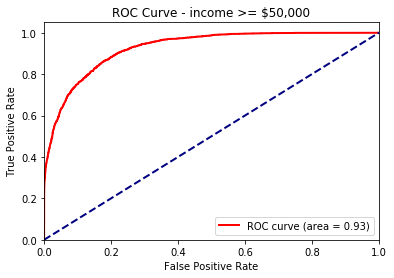

In [117]:
plt.figure()
lw = 2
plt.plot(fpr_1, tpr_1, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - income >= $50,000')
plt.legend(loc="lower right")
plt.show()